# **MDS3120: Álgebra Lineal Numérica para la Ciencia de Datos**

## **Actividad Sincrónica:** Bases ortonormales y reducción de ruido

### 11 de junio del 2024

In [1]:
# imports
import numpy as np

from itertools import product 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['agg.path.chunksize'] = 10000

En esta actividad, estudiaremos cómo una elección apropiada de una base ortonormal nos permite representar información de manera eficiente. Usaremos como aplicación concreta la **reducción de ruido** en una imagen.

## **Contenidos**

1. [Vectores Gaussianos](#vectores-gaussianos)
2. [Ruido aditivo Gaussiano](#ruido-aditivo-gaussiano)
3. [Ruido Gaussiano y bases ortonormales](#ruido-gaussiano-y-bases-ortonormales)
4. [Las coordenadas de una imagen en dos bases ortonormales](#las-coordenadas-de-una-imagen-en-dos-bases-ortonormales)
5. [Reducción de ruido usando truncamiento de coordenadas](#reducción-de-ruido-usando-truncamiento-de-coordenadas)

## **Vectores Gaussianos**

Una **variable aleatoria Gaussiana** $z$ tiene una densidad de probabilidad
$$
    p_z(z) = \frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2}z^2}.
$$
Esto corresponde a una distribución $\mathcal{N}(0, 1)$.

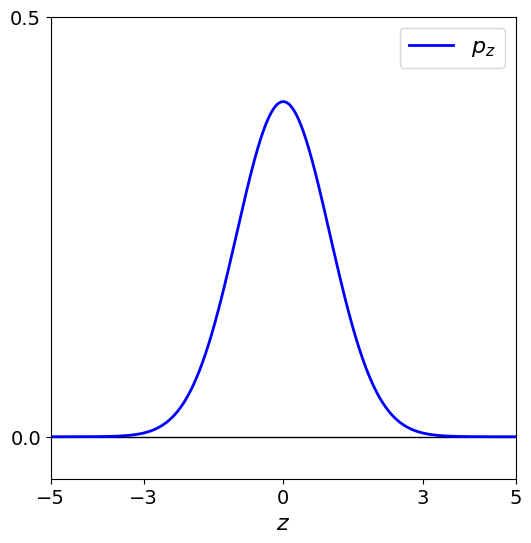

In [2]:
# numero de puntos
num_z = 1024
# puntos de evaluacion
z = np.linspace(-5, 5, num_z)
# densidad
pZ = np.exp(-0.5 * z ** 2) / np.sqrt(2 * np.pi)

plt.figure(figsize=(6, 6))
plt.plot([ z.min(), z.max() ], [ 0, 0 ], color='k', linewidth=1)
plt.plot(z, pZ, color='b', linewidth=2, label='$p_z$')
plt.xlim([ z.min(), z.max() ])
plt.ylim([ -0.05, 0.5 ])
plt.xticks([ -5, -3, 0, +3, +5 ], fontsize=14)
plt.yticks([ 0, 0.5 ], fontsize=14)
plt.xlabel('$z$', fontsize=16)
plt.legend(fontsize=16)
plt.show()

Podemos generar muestras independientes de esta densidad usando ``numpy.random.randn``. 

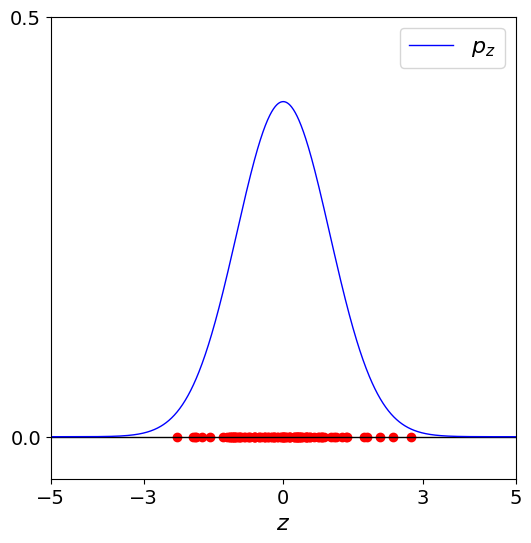

In [3]:
# numero de muestras
num_z_samp = 100
# muestras
z_samp = np.random.randn(num_z_samp)

plt.figure(figsize=(6, 6))
plt.plot([ z.min(), z.max() ], [ 0, 0 ], color='k', linewidth=1)
plt.plot(z, pZ, color='b', linewidth=1, label='$p_z$')
plt.scatter(z_samp, np.zeros((num_z_samp,)), color='r', marker='o')
plt.xlim([ z.min(), z.max() ])
plt.ylim([ -0.05, 0.5 ])
plt.xticks([ -5, -3, 0, +3, +5 ], fontsize=14)
plt.yticks([ 0, 0.5 ], fontsize=14)
plt.xlabel('$z$', fontsize=16)
plt.legend(fontsize=16)
plt.show()

Podemos tambien hacer un histograma normalizado para visualizar la frecuencia con la que las muestras toman un valor en intervalos dados. 

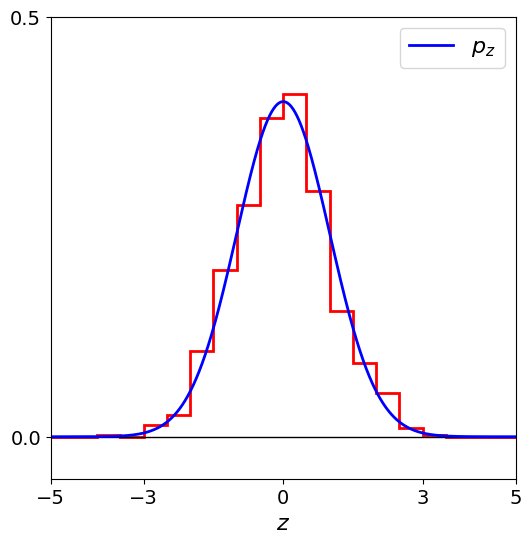

In [4]:
# numero de muestras
num_z_samp = 1000
# muestras
z_samp = np.random.randn(num_z_samp)
# histograma
cnts, bins = np.histogram(z_samp, range=[ z.min(), z.max() ], bins=20, density=True)

plt.figure(figsize=(6, 6))
plt.plot([ z.min(), z.max() ], [ 0, 0 ], color='k', linewidth=1)
plt.stairs(cnts, bins, color='r', linewidth=2)
plt.plot(z, pZ, color='b', linewidth=2, label='$p_z$')
plt.xlim([ z.min(), z.max() ])
plt.ylim([ -0.05, 0.5 ])
plt.xticks([ -5, -3, 0, +3, +5 ], fontsize=14)
plt.yticks([ 0, 0.5 ], fontsize=14)
plt.xlabel('$z$', fontsize=16)
plt.legend(fontsize=16)
plt.show()

Un **vector Gaussiano $Z$ en $\mathbb{R}^d$** es un vector aleatorio cuyas componentes son **variables aleatorias Gaussianas independientes**. Esto corresponde a la distribución $\mathcal{N}(0, I)$. También podemos generar muestras de vectores Gaussianos usando la función ``numpy.random.randn``. 

En 2D la densidad es
$$
    p_Z(z) = \frac{1}{2\pi} e^{-\frac{1}{2}\|z\|^2}
$$
o bien
$$
    p_Z(z_1, z_2) = \frac{1}{2\pi} e^{-\frac{1}{2}(z_1^2 + z_2^2)}
$$

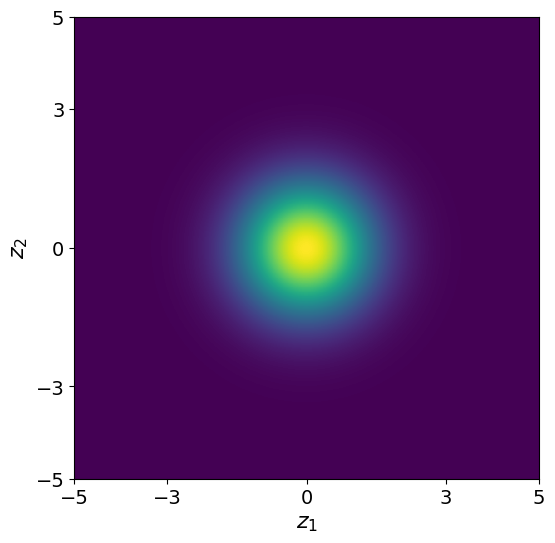

In [5]:
# celdas de evaluacion en 2D
z_bins = np.linspace(-5, 5, num_z + 1)
[ zx_bins, zy_bins ] = np.meshgrid(z_bins, z_bins)
# densidad
zx = 0.5 * (zx_bins[:num_z, :num_z] + zx_bins[1:num_z + 1, 1:num_z + 1])
zy = 0.5 * (zy_bins[:num_z, :num_z] + zy_bins[1:num_z + 1, 1:num_z + 1])
pZ = np.exp(-(zx ** 2 + zy ** 2) / 2) / (2 * np.pi)

plt.figure(figsize=(6, 6))
plt.pcolor(zx_bins, zy_bins, pZ)
plt.xlim([ z.min(), z.max() ])
plt.ylim([ z.min(), z.max() ])
plt.xticks([ -5, -3, 0, +3, +5 ], fontsize=14)
plt.yticks([ -5, -3, 0, +3, +5 ], fontsize=14)
plt.xlabel('$z_1$', fontsize=16)
plt.ylabel('$z_2$', fontsize=16)
plt.show()

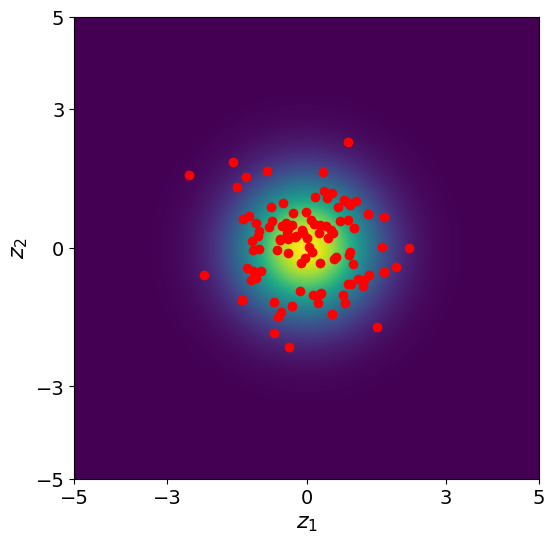

In [6]:
# numero de muestras
num_z_samp = 100
# muestras
z_samp = np.random.randn(num_z_samp, 2)

plt.figure(figsize=(6, 6))
plt.pcolor(zx_bins, zy_bins, pZ)
plt.scatter(z_samp.T[0], z_samp.T[1], color='r', marker='o', zorder=5)
plt.xlim([ z.min(), z.max() ])
plt.ylim([ z.min(), z.max() ])
plt.xticks([ -5, -3, 0, +3, +5 ], fontsize=14)
plt.yticks([ -5, -3, 0, +3, +5 ], fontsize=14)
plt.xlabel('$z_1$', fontsize=16)
plt.ylabel('$z_2$', fontsize=16)
plt.show()

## **Ruido aditivo Gaussiano**

Frecuentemente los dispositivos de medición digitales generan un **vector** con los valores medidos, p.ej., valores de temperatura, amplitud de una onda de audio, intensidad en una imagen, etc. Sin embargo, debido a imperfecciones en el sistema de medición, o bien debido a la naturaleza del sistema de medición, los valores registrados por el sistema son afectados por una fluctuación **aleatoria**. Llamamos a esta fluctuación **ruido**.

Si llamamos $x_0 \in \mathbb{R}^d$ al vector asociado a las mediciones idealizadas, esto es, en ausencia de estas fluctuaciones, entonces una forma popular de modelar el efecto de ellas es a través del **modelo aditivo Gaussiano**
$$
    y = x_0 + \sigma z
$$
donde $z$ es un vector aleatorio Gaussiano que representa el ruido, y $\sigma >0$ es la desviación estándar del ruido.  

Estudiamos un ejemplo del efecto del ruido en **audio**.

In [8]:
import soundfile

Informacion
Frecuencia de muestreo (Hz)  :  44100
Muestras                     :  464256
Intervalo (s)                :  10.52732426303855


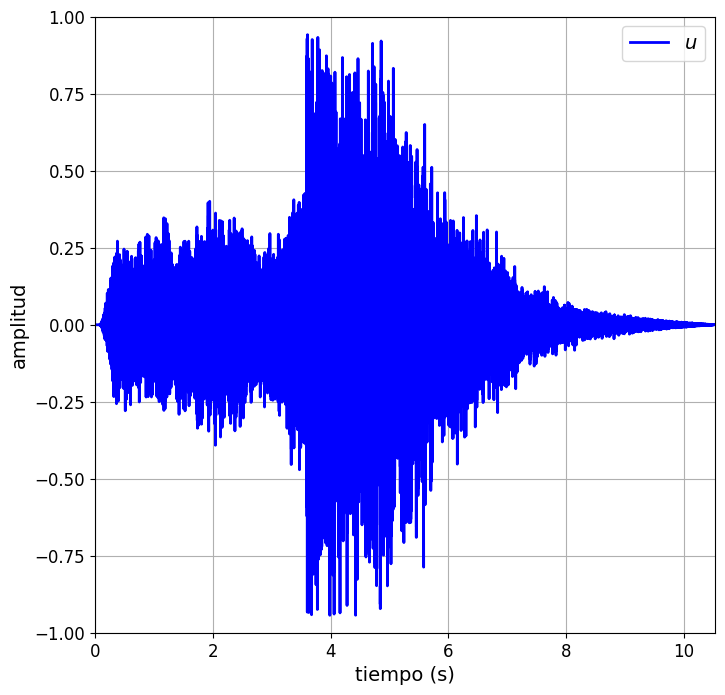

In [9]:
# la función soundfile.read retorna
#   u en una tupla con 2 elementos
#       un arreglo de N x C con muestras de audio
#           N es el número de muestras
#           C es el número de canales
#       la frecuencia de muestreo en Hz
# IMDS3120_AUDIO_CLIP.wav es monoaural y tiene sólo un canal
u = soundfile.read('MDS3120_AUDIO_CLIP.wav')

# frecuencia de muestreo de la señal (Hz)
fs = u[1]
# señal monoaural
u = u[0]
# número de muestras
num_t = u.size
# intervalo de tiempo
t_max = (num_t-1) / fs
# periodo de muestreo
dt = 1/fs
# instantes de muestreo
t = np.array([ I * dt for I in range(num_t) ])

print('Informacion')
print('Frecuencia de muestreo (Hz)  : ', fs)
print('Muestras                     : ', num_t)
print('Intervalo (s)                : ', t_max)

plt.figure(figsize=(8, 8))
plt.plot(t, u, label='$u$', linewidth=2, color='b')
plt.xlim([ 0.0, t_max ])
plt.ylim([ -1.0, +1.0 ])
plt.grid(True)
plt.legend(fontsize=14, loc='upper right')
plt.xlabel('tiempo (s)', fontsize=14)
plt.ylabel('amplitud', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [10]:
# desviacion estandar
z_std = 1E-1
# señal ruidosa
y = u + z_std * np.random.randn(u.size)
# grabamos la señal de audio
soundfile.write('MDS3120_AUDIO_CLIP_RUIDO.wav', y, fs)

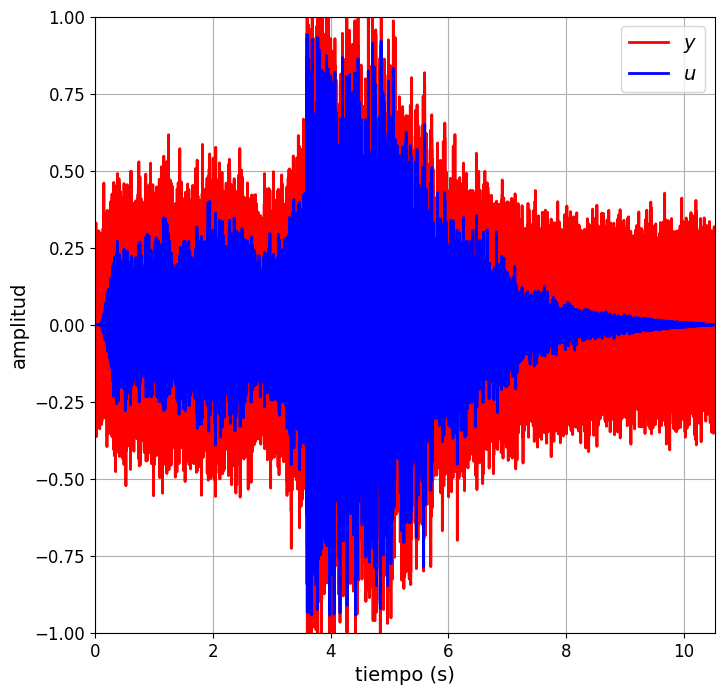

In [11]:
plt.figure(figsize=(8, 8))
plt.plot(t, y, label='$y$', linewidth=2, color='r')
plt.plot(t, u, label='$u$', linewidth=2, color='b')
plt.xlim([ 0.0, t_max ])
plt.ylim([ -1.0, +1.0 ])
plt.grid(True)
plt.legend(fontsize=14, loc='upper right')
plt.xlabel('tiempo (s)', fontsize=14)
plt.ylabel('amplitud', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Podemos ver el efecto del ruido haciendo un histograma de los valores del vector original y el vector con ruido.

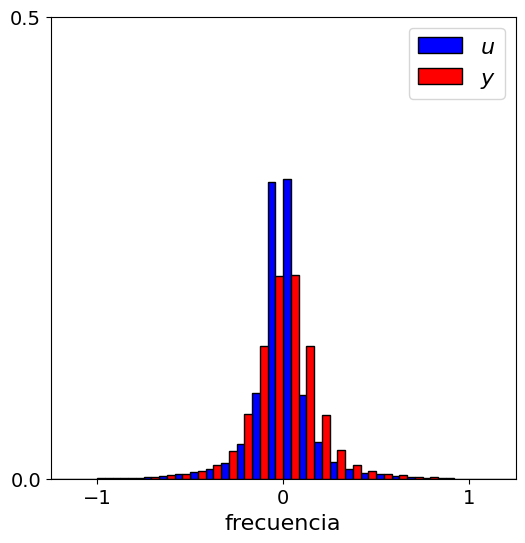

In [12]:
# histograma
cnts_u, bins = np.histogram(u, range=[ -1.25, 1.25 ], bins=30, density=False)
cnts_y, _ = np.histogram(y, range=[ -1.25, 1.25 ], bins=30, density=False)
cnts_u = cnts_u / u.size
cnts_y = cnts_y / y.size
ctr_u = bins[:-1] + 0.25 * np.diff(bins)
ctr_y = bins[:-1] + 0.75 * np.diff(bins)
bins_width = bins[1] - bins[0]

plt.figure(figsize=(6, 6))
plt.bar(ctr_u, cnts_u, width=0.5 * bins_width, color='b', align='center', label='$u$', edgecolor='k')
plt.bar(ctr_y, cnts_y, width=0.5 * bins_width, color='r', align='center', label='$y$', edgecolor='k')
plt.xlim([ bins.min(), bins.max() ])
plt.ylim([ 0.0, 0.5 ])
plt.xticks([ -1, 0, +1 ], fontsize=14)
plt.yticks([ 0, 0.5 ], fontsize=14)
plt.xlabel('componente', fontsize=16)
plt.xlabel('frecuencia', fontsize=16)
plt.legend(fontsize=16)
plt.show()

Estudiamos ahora el efecto del ruido en una **imagen**.

In [13]:
# importamos ejemplos
import pywt.data

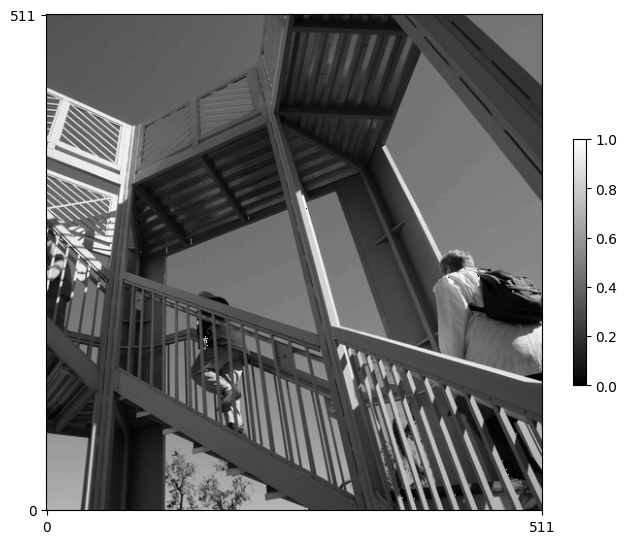

In [14]:
# imagen
X = np.flipud(pywt.data.ascent())
X = X / X.max()
# número de pixeles
N = X.shape[0]

plt.figure(figsize=(8, 8))
plt.imshow(X, origin='lower', cmap='gray')
plt.xticks([ 0, N - 1 ])
plt.yticks([ 0, N - 1 ])
plt.colorbar(shrink=0.4)
plt.show()

In [15]:
# desviacion estandar
z_std = 5E-2
# señal ruidosa
Y = X + z_std * np.random.randn(*X.shape)

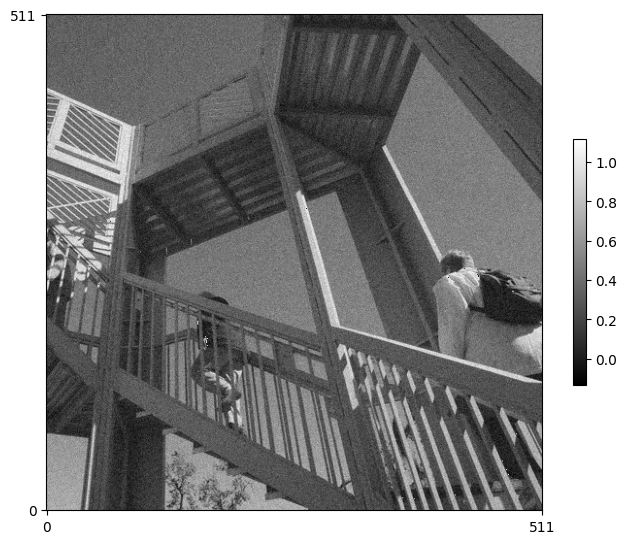

In [16]:
plt.figure(figsize=(8, 8))
plt.imshow(Y, origin='lower', cmap='gray')
plt.xticks([ 0, N - 1 ])
plt.yticks([ 0, N - 1 ])
plt.colorbar(shrink=0.4)
plt.show()

Podemos ver el efecto del ruido haciendo un histograma de los valores de la imagen original y el vector con ruido.

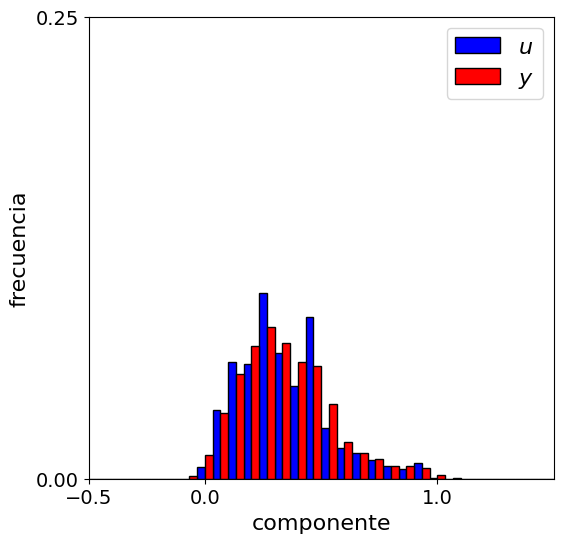

In [16]:
# histograma
cnts_u, bins = np.histogram(X.ravel(), range=[ -0.5, 1.5 ], bins=30, density=False)
cnts_y, _ = np.histogram(Y.ravel(), range=[ -0.5, 1.5 ], bins=30, density=False)
cnts_u = cnts_u / u.size
cnts_y = cnts_y / y.size
ctr_u = bins[:-1] + 0.25 * np.diff(bins)
ctr_y = bins[:-1] + 0.75 * np.diff(bins)
bins_width = bins[1] - bins[0]

plt.figure(figsize=(6, 6))
plt.bar(ctr_u, cnts_u, width=0.5 * bins_width, color='b', align='center', label='$u$', edgecolor='k')
plt.bar(ctr_y, cnts_y, width=0.5 * bins_width, color='r', align='center', label='$y$', edgecolor='k')
plt.xlim([ bins.min(), bins.max() ])
plt.ylim([ 0.0, 0.25 ])
plt.xticks([ -0.5, 0.0, +1.0 ], fontsize=14)
plt.yticks([ 0, 0.25 ], fontsize=14)
plt.xlabel('componente', fontsize=16)
plt.ylabel('frecuencia', fontsize=16)
plt.legend(fontsize=16)
plt.show()

Nuestro objetivo es entender cómo se puede reducir el ruido en la imagen usando **bases ortonormales**.

## **Ruido Gaussiano y bases ortonormales**

Una primera propiedad de las bases ortonormales es que **las coordenadas de un vector Gaussiano en una base ortonormal corresponden a un vector Gaussiano**.

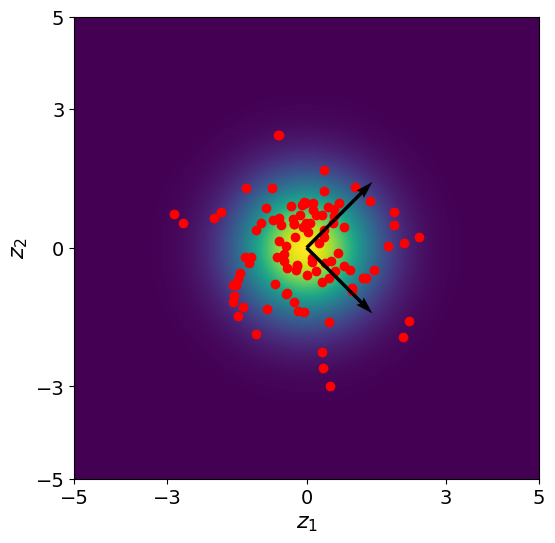

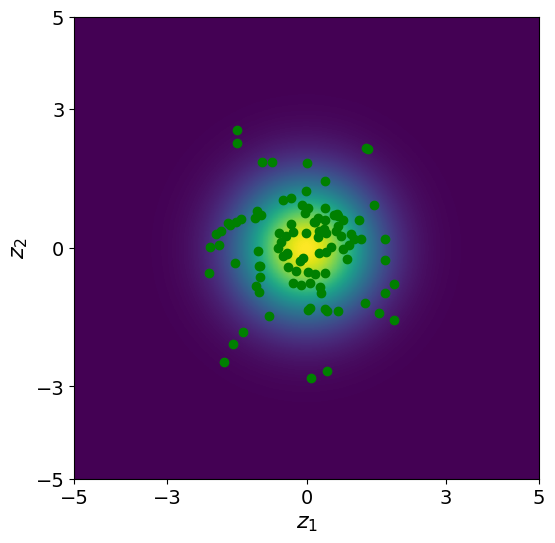

In [17]:
# numero de muestras
num_z_samp = 100
# muestras
z_samp = np.random.randn(num_z_samp, 2)
# base ortogonal
Q = np.array([ [ 1, -1 ], [ 1, 1 ] ]) / np.sqrt(2)
# muestras de un vector Gaussiano
plt.figure(figsize=(6, 6))
plt.pcolor(zx_bins, zy_bins, pZ)
plt.scatter(z_samp.T[0], z_samp.T[1], color='r', marker='o', zorder=5)
plt.quiver(np.zeros((2,)), np.zeros((2,)), Q.T[0], Q.T[1], scale=5, color='k', zorder=10)
plt.xlim([ z.min(), z.max() ])
plt.ylim([ z.min(), z.max() ])
plt.xticks([ -5, -3, 0, +3, +5 ], fontsize=14)
plt.yticks([ -5, -3, 0, +3, +5 ], fontsize=14)
plt.xlabel('$z_1$', fontsize=16)
plt.ylabel('$z_2$', fontsize=16)
plt.show()
# coordenadas del vector Gaussiano
plt.figure(figsize=(6, 6))
plt.pcolor(zx_bins, zy_bins, pZ)
plt.scatter((Q.T @ z_samp.T)[0], (Q.T @ z_samp.T)[1], color='g', marker='o', zorder=5)
plt.xlim([ z.min(), z.max() ])
plt.ylim([ z.min(), z.max() ])
plt.xticks([ -5, -3, 0, +3, +5 ], fontsize=14)
plt.yticks([ -5, -3, 0, +3, +5 ], fontsize=14)
plt.xlabel('$z_1$', fontsize=16)
plt.ylabel('$z_2$', fontsize=16)
plt.show()

Por lo tanto, si los vectores
$$
    v_1, \ldots, v_n
$$
forman una **base ortonormal de $\mathbb{R}^d$** y tenemos observaciones del modelo aditivo Gaussiano
$$
    y = x_0 + \sigma z
$$
entonces las coordenadas siguen el mismo modelo, esto es,
$$
    v_i \cdot y = v_i \cdot x_0 + \sigma z_i'
$$
donde $z'$ es también un vector Gaussiano.

## **Las coordenadas de una imagen en dos bases ortonormales**

### **La base del coseno discreto**

La base de coseno discreto (DCT) es una **base ortonormal** del espacio de imágenes de $N\times N$ pixeles.

Cada elemento de la base de coseno discreto captura una **oscilación** a una **frecuencia** determinada a lo largo de toda la imagen imagen. El espacio de imágenes de $N\times N$ pixeles tiene dimensión $d = N^2$. Por lo tanto, la base de coseno discreto tiene $N^2$ elementos.

Visualizamos los elementos de la base de coseno discreto para una imagen de $8\times 8$ pixeles. Para ello, usamos las funciones ``dctn`` e ``idctn``.

In [18]:
# importamos la función
from scipy.fft import dctn, idctn

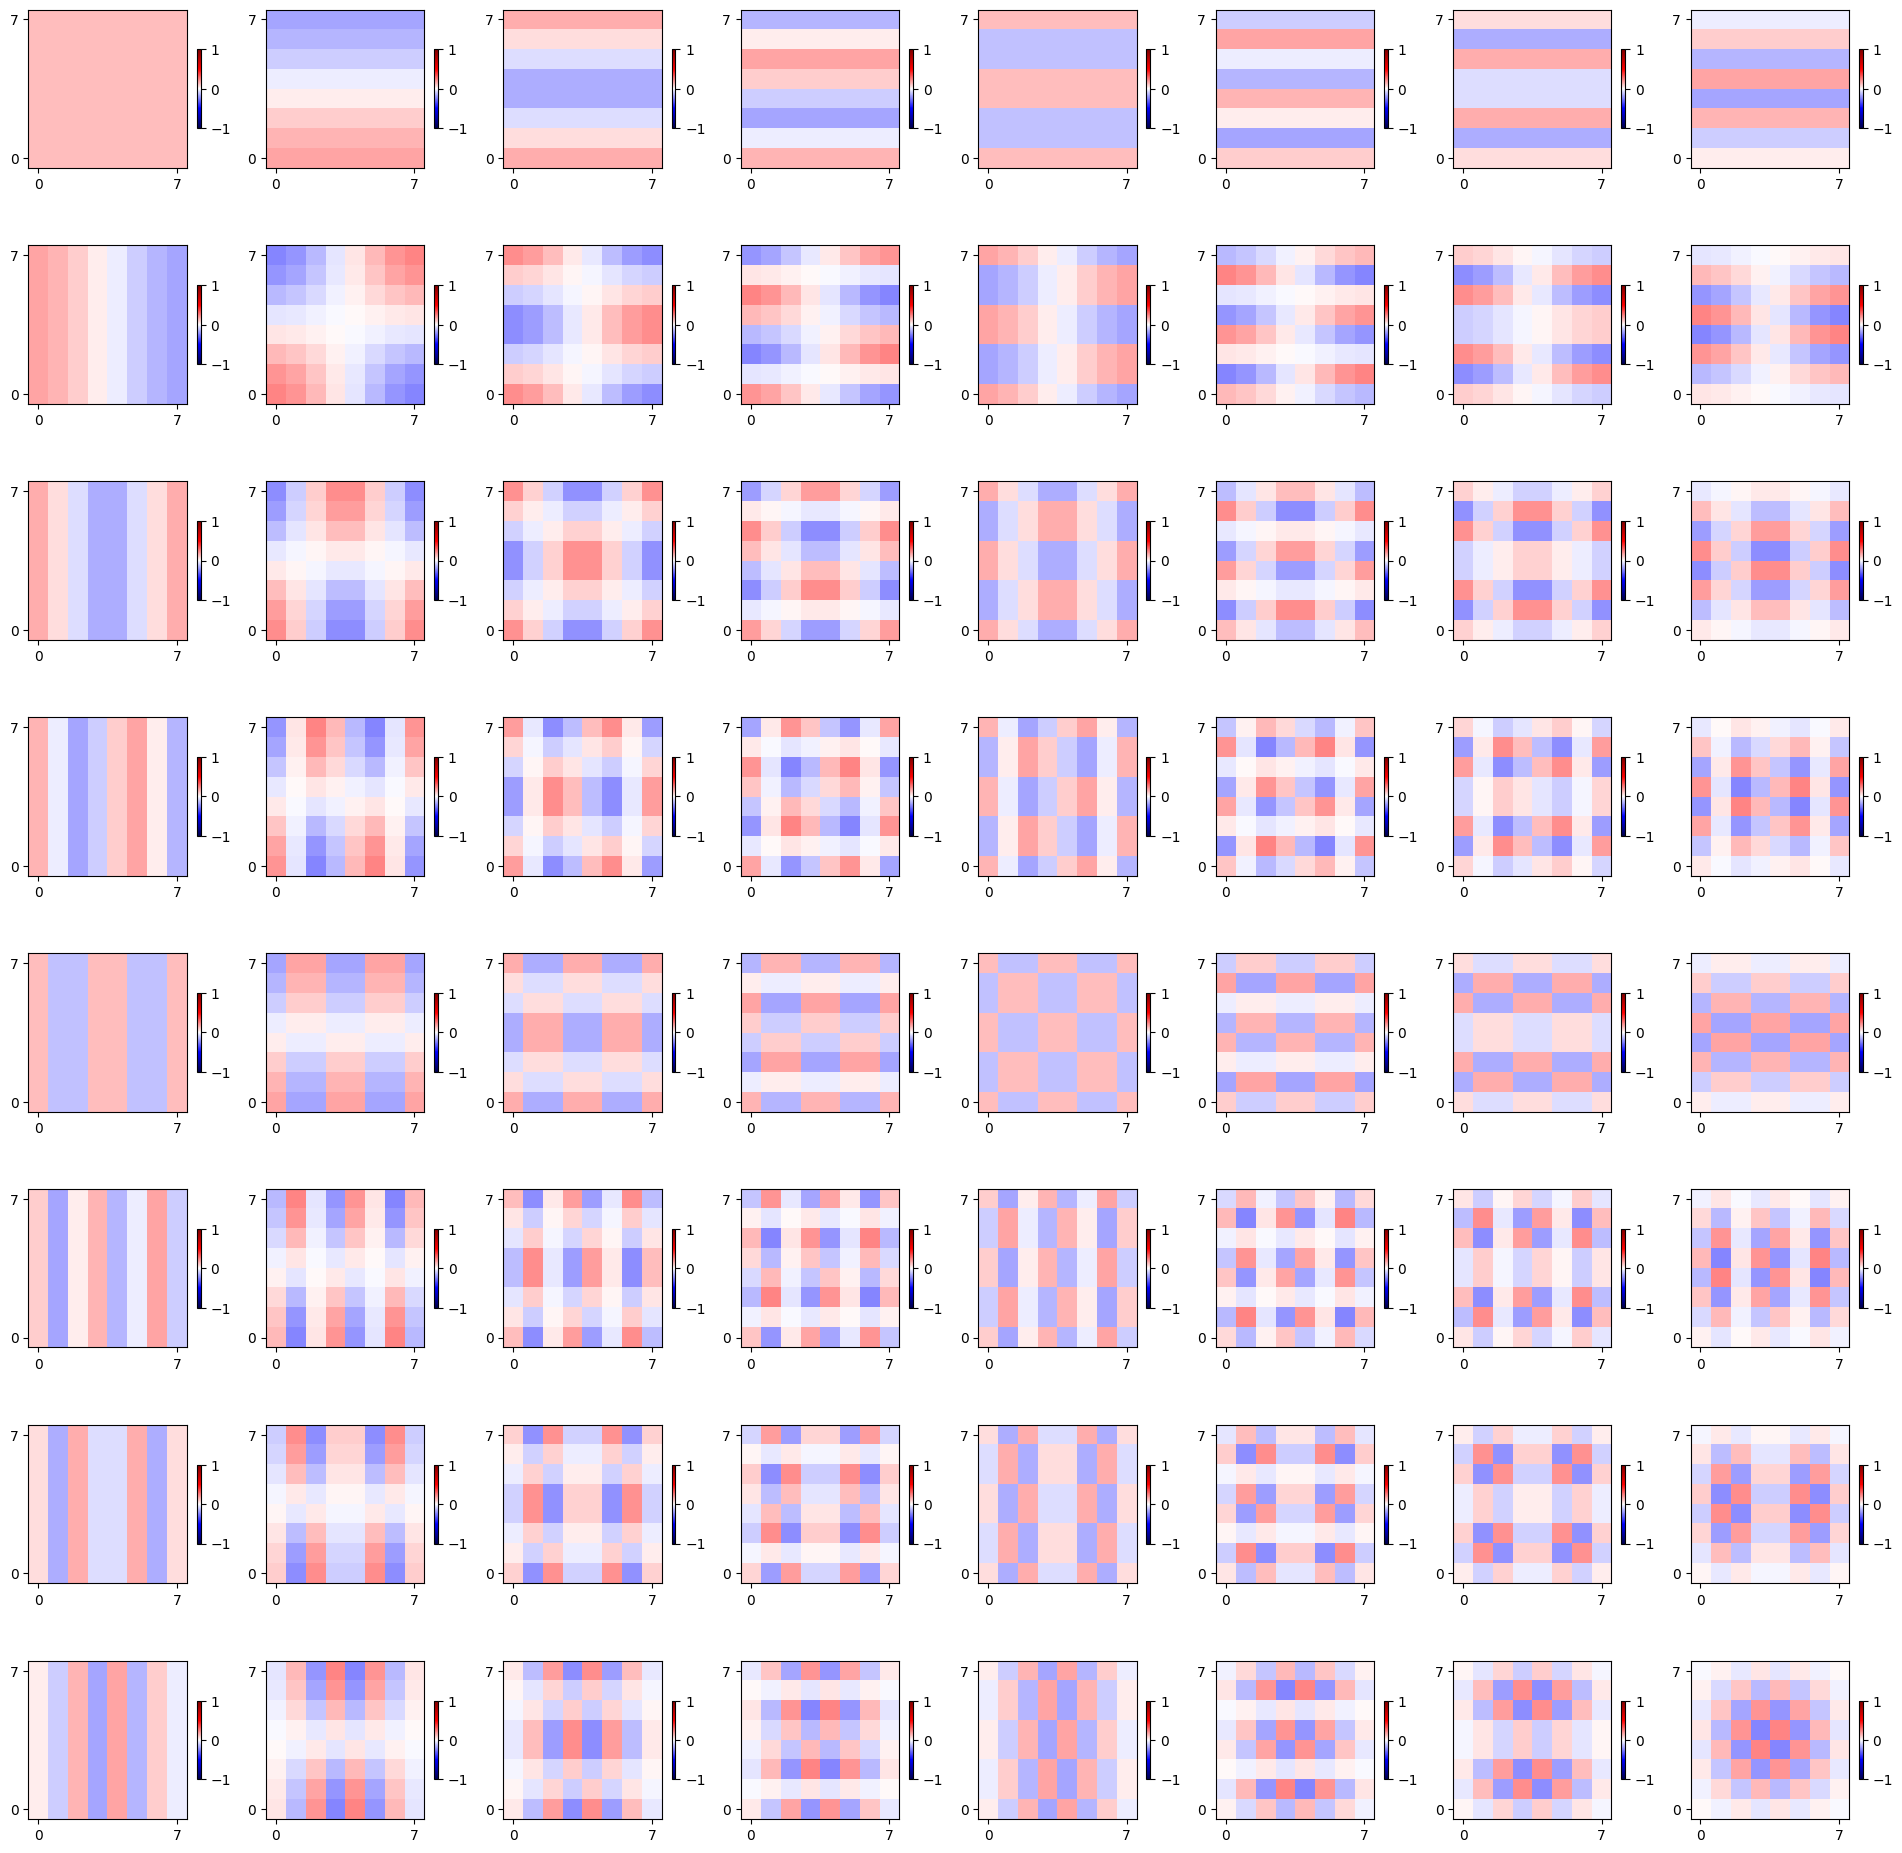

In [19]:
# valor de N
Ndct = 8
# esta porcion de codigo determina algunas variables auxiliares
Cdct = np.zeros((Ndct, Ndct))
# graficamos los elementos de la base
plt.figure(figsize=(24, 24))
for I, J in product(range(Ndct), range(Ndct)):
    Cdct[I, J] = 1
    C = idctn(Cdct, norm='ortho')
    Cdct[I, J] = 0

    plt.subplot(Ndct, Ndct, 1 + I + Ndct * J)
    plt.imshow(C, vmin=-1.0, vmax=+1.0, origin='lower', cmap='seismic')
    plt.xticks([ 0, Ndct - 1 ])
    plt.yticks([ 0, Ndct - 1 ])
    plt.colorbar(shrink=0.4)
plt.show()

Podemos calcular las coordenadas de la imagen en esta base. 

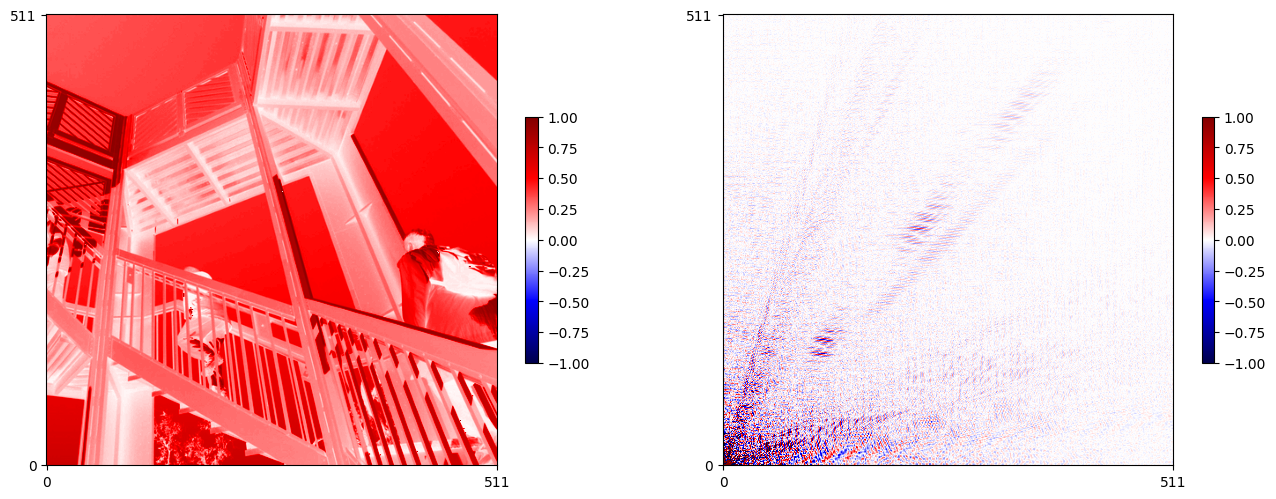

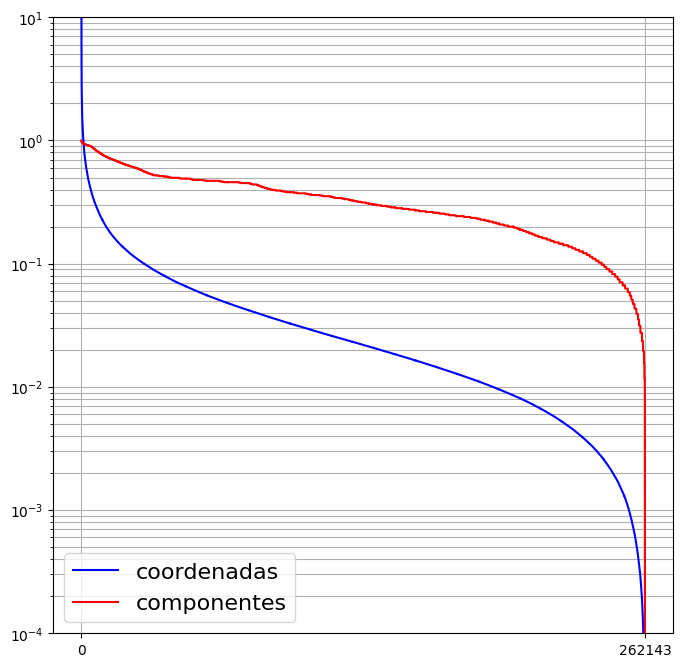

In [20]:
# coordenadas en la base de coseno discreto
CX = dctn(X, norm='ortho')
# magnitudes de las coordenadas en orden decreciente
CXord = np.flipud(np.sort(np.abs(CX.ravel())))
# magnitudes de las intensidades de la imagen en orden decreciente
Xord = np.flipud(np.sort(np.abs(X.ravel())))

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.imshow(X, origin='lower', cmap='seismic', vmin=-1.0, vmax=1.0)
plt.xticks([ 0, N - 1 ])
plt.yticks([ 0, N - 1 ])
plt.colorbar(shrink=0.4)
plt.subplot(1, 2, 2)
plt.imshow(CX, origin='lower', cmap='seismic', vmin=-1.0, vmax=1.0)
plt.xticks([ 0, N - 1 ])
plt.yticks([ 0, N - 1 ])
plt.colorbar(shrink=0.4)
plt.show()

plt.figure(figsize=(8, 8))
plt.plot(range(N ** 2), CXord, color='b', label='coordenadas')
plt.plot(range(N ** 2), Xord, color='r', label='componentes')
plt.xticks([ 0, N ** 2 - 1 ])
plt.yticks([ 1E-4, 1E+0 ])
plt.ylim([ 1E-4, 1E+1 ])
plt.yscale('log')
plt.grid('on', which='both')
plt.legend(fontsize=16, loc='lower left')
plt.show()

### **La base de wavelets de Haar**

La base de wavelets de Haar es también una **base ortonormal** del espacio de imágenes de $N\times N$ pixeles. En general se asume que $N$ es una **potencia de dos**.

Cada elemento de la base de wavelets de Haar captura una **oscilación** en una **escala** y **posición** determinada.  El espacio de imágenes de $N\times N$ pixeles tiene dimensión $d = N^2$. Por lo tanto, la base de wavelets de Haar tiene $N^2$ elementos. Cuando $N$ es una potencia de dos, el número de escala es $\log_2(N)$. 

Visualizamos los elementos de la base de Haar para una imagen de $8\times 8$ pixeles. Para ello, usamos el paquete ``pywavelets``.

In [21]:
# importamos el paquete pywavelets
import pywt as pywt

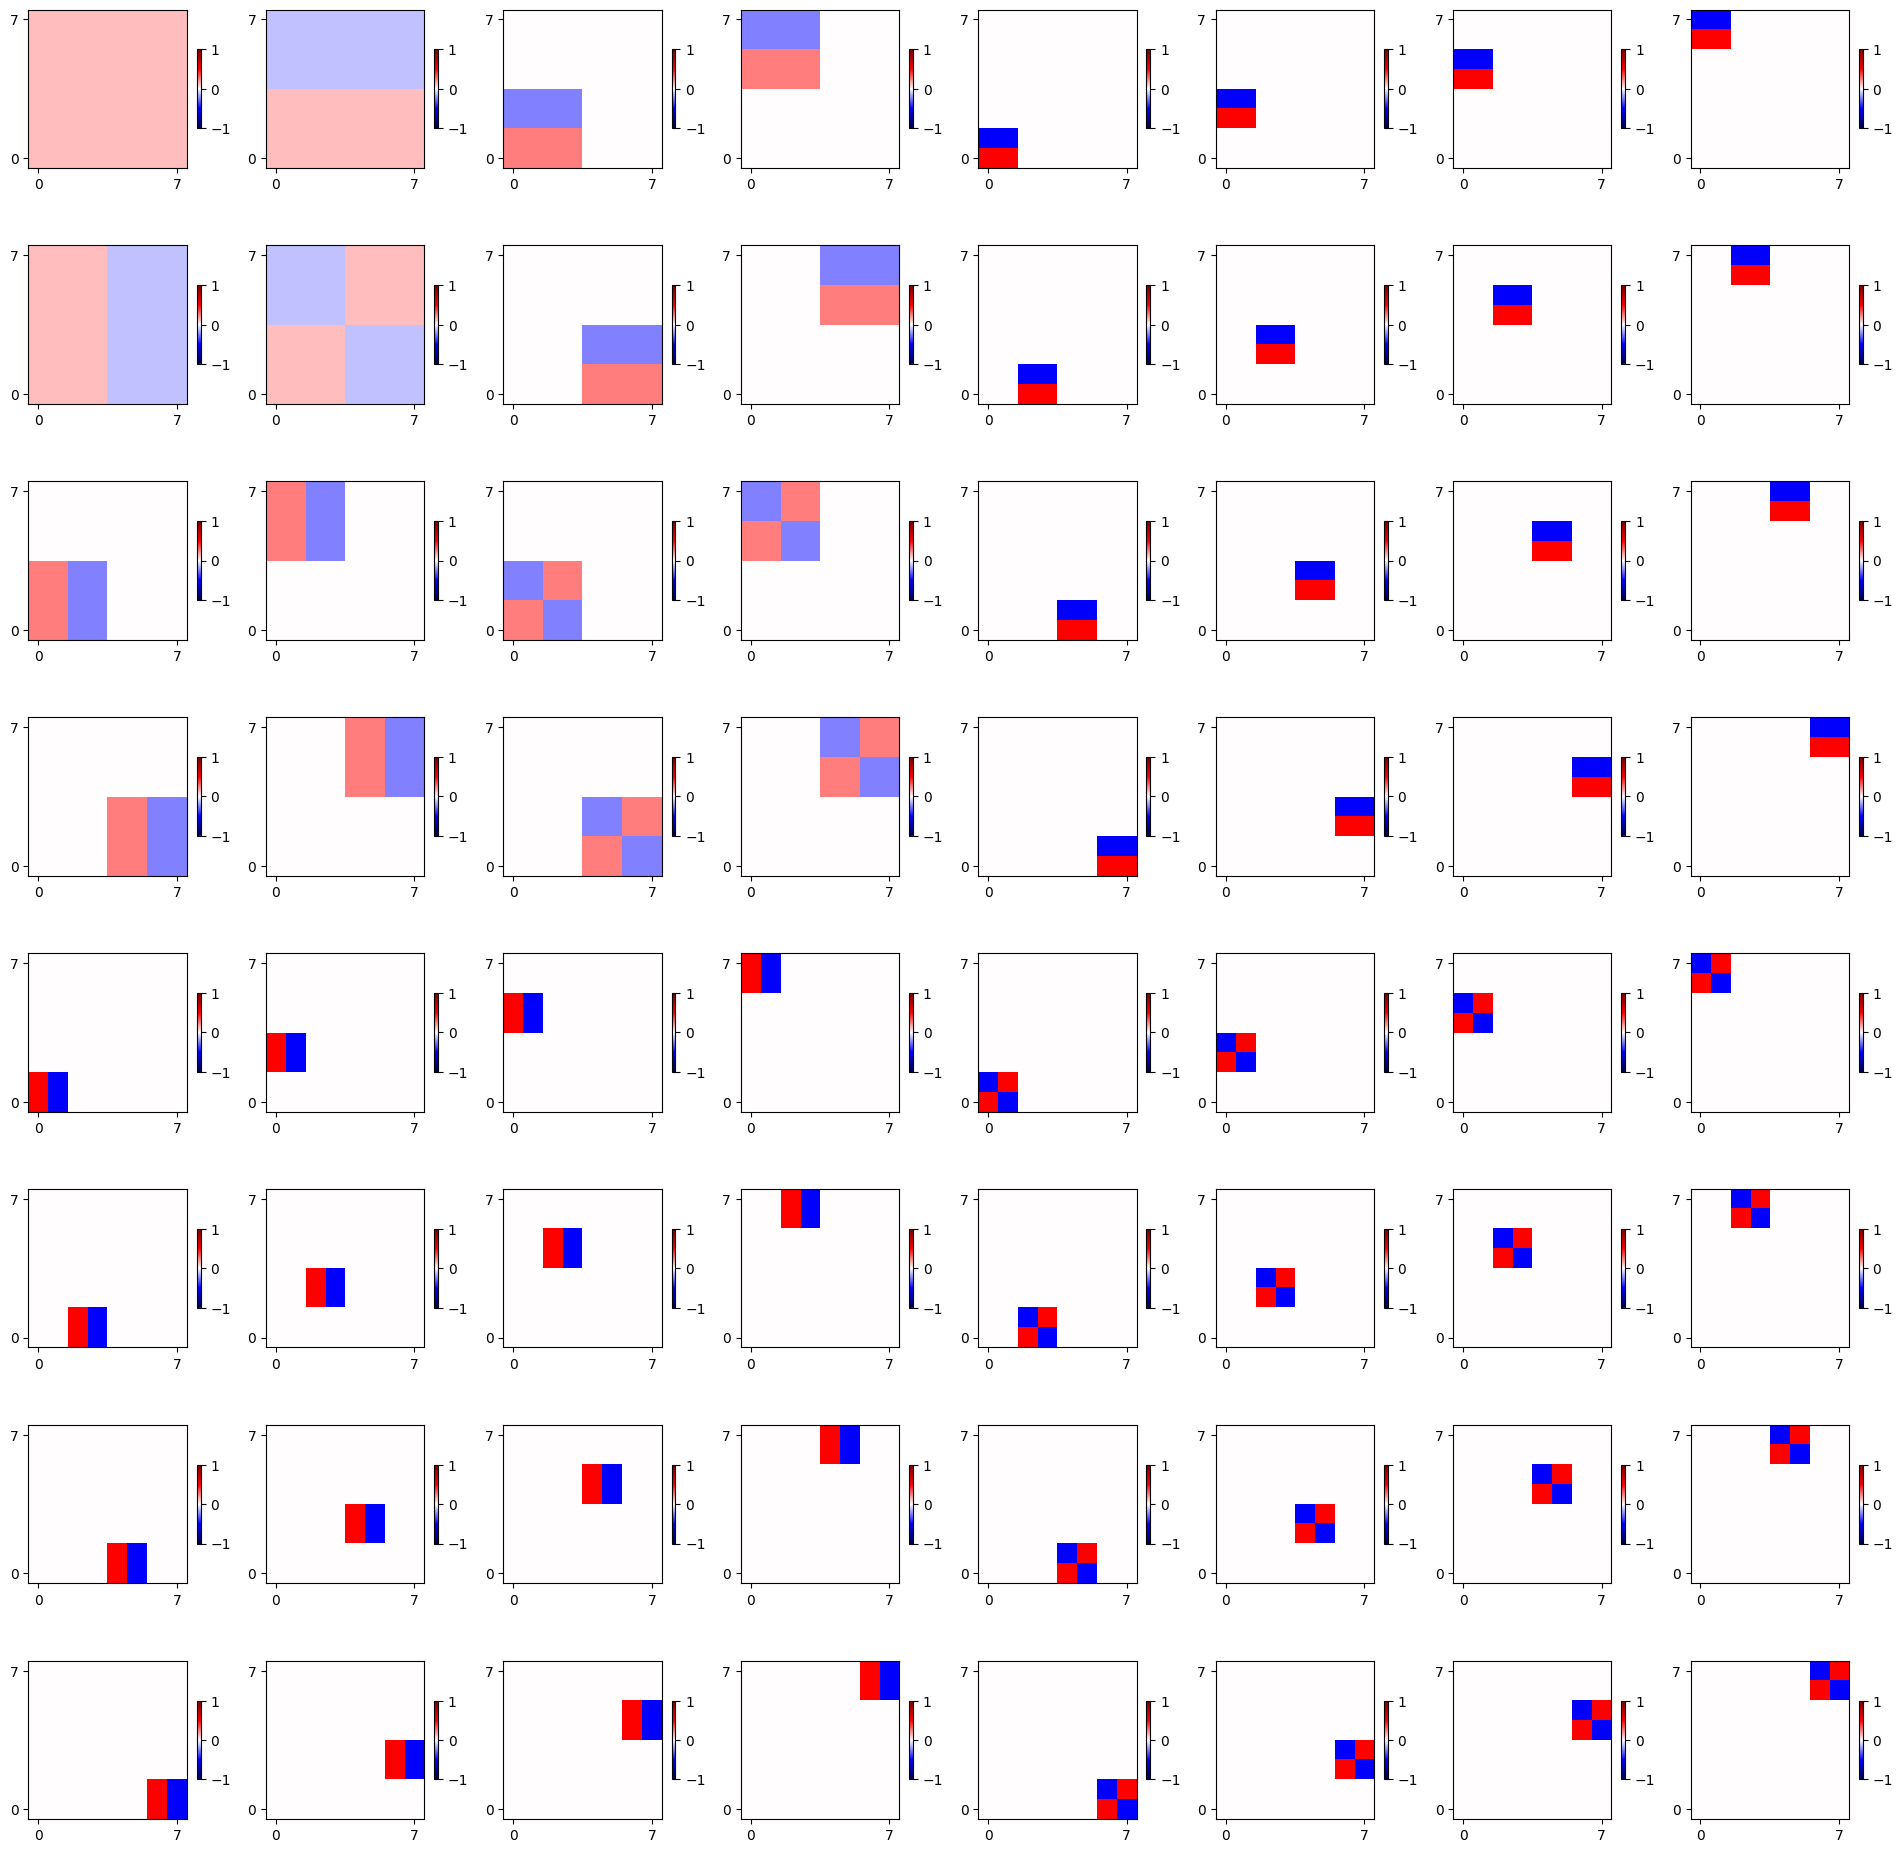

In [22]:
# valor de N
Nwd = 8
# esta porcion de codigo determina algunas variables auxiliares
WX = pywt.wavedec2(np.zeros((Nwd, Nwd)), 'haar', mode='periodic', level=None)
WX, BWX = pywt.coeffs_to_array(WX)
# graficamos los elementos de la base
plt.figure(figsize=(24, 24))
for I, J in product(range(Nwd), range(Nwd)):
    WX[I, J] = 1
    W = pywt.waverec2(pywt.array_to_coeffs(WX, BWX, output_format='wavedec2'), 'haar', mode='periodic')
    WX[I, J] = 0

    plt.subplot(Nwd, Nwd, 1 + I + Nwd * J)
    plt.imshow(W, vmin=-1.0, vmax=+1.0, origin='lower', cmap='seismic')
    plt.xticks([ 0, Nwd - 1 ])
    plt.yticks([ 0, Nwd - 1 ])
    plt.colorbar(shrink=0.4)
plt.show()

Podemos también calcular las coordenadas de nuestra imagen en esta base.

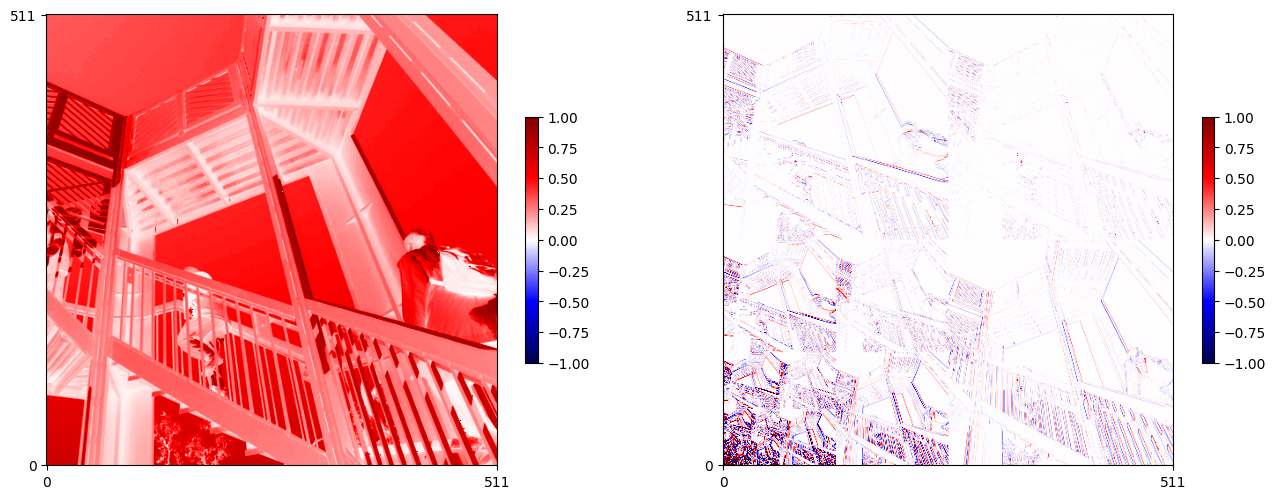

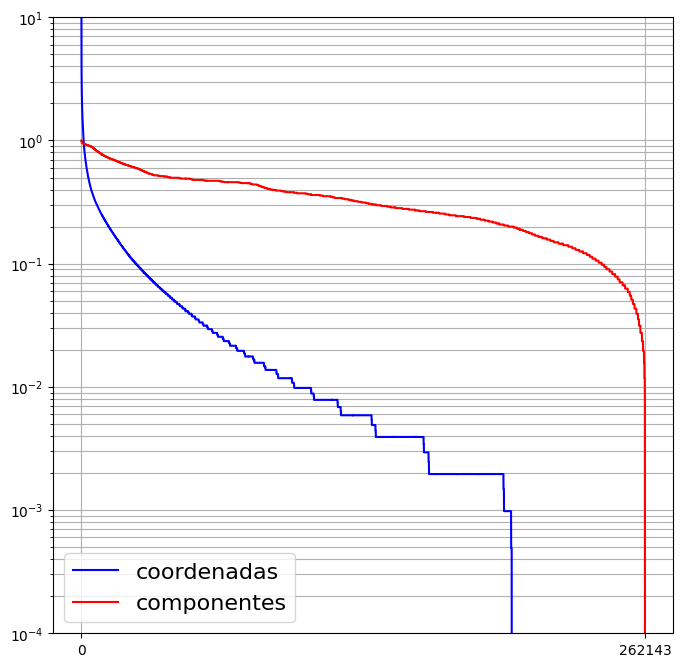

In [23]:
# coordenadas en la base de wavelets de haar
WX, BWX = pywt.coeffs_to_array(pywt.wavedec2(X, 'haar', mode='periodic', level=None))
# magnitudes de las coordenadas en orden decreciente
WXord = np.flipud(np.sort(np.abs(WX.ravel())))
# magnitudes de las intensidades de la imagen en orden decreciente
Xord = np.flipud(np.sort(np.abs(X.ravel())))

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.imshow(X, origin='lower', cmap='seismic', vmin=-1.0, vmax=1.0)
plt.xticks([ 0, N - 1 ])
plt.yticks([ 0, N - 1 ])
plt.colorbar(shrink=0.4)
plt.subplot(1, 2, 2)
plt.imshow(WX, origin='lower', cmap='seismic', vmin=-1.0, vmax=1.0)
plt.xticks([ 0, N - 1 ])
plt.yticks([ 0, N - 1 ])
plt.colorbar(shrink=0.4)
plt.show()

plt.figure(figsize=(8, 8))
plt.plot(range(N ** 2), WXord, color='b', label='coordenadas')
plt.plot(range(N ** 2), Xord, color='r', label='componentes')
plt.xticks([ 0, N ** 2 - 1 ])
plt.yticks([ 1E-4, 1E+0 ])
plt.ylim([ 1E-4, 1E+1 ])
plt.yscale('log')
plt.grid('on', which='both')
plt.legend(fontsize=16, loc='lower left')
plt.show()

Podemos comparar el decaimiento de las coordenadas en una base u otra.

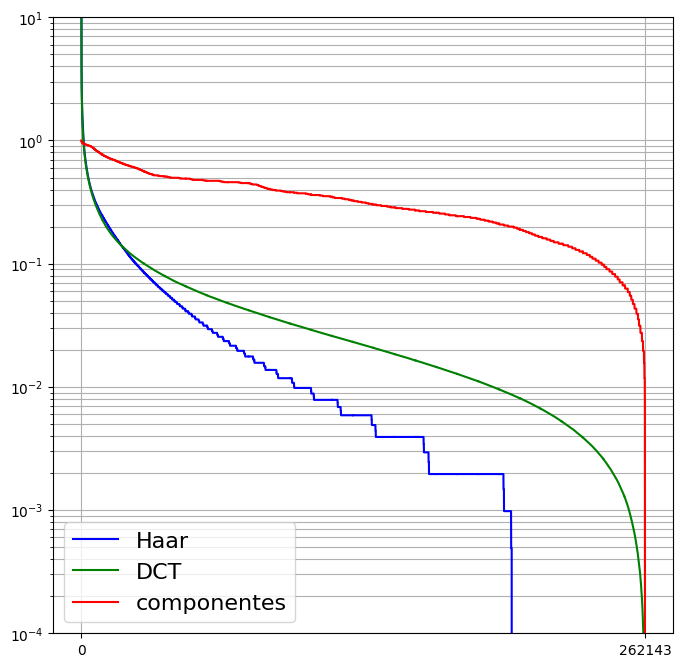

In [24]:
plt.figure(figsize=(8, 8))
plt.plot(range(N ** 2), WXord, color='b', label='Haar')
plt.plot(range(N ** 2), CXord, color='g', label='DCT')
plt.plot(range(N ** 2), Xord, color='r', label='componentes')
plt.xticks([ 0, N ** 2 - 1 ])
plt.yticks([ 1E-4, 1E+0 ])
plt.ylim([ 1E-4, 1E+1 ])
plt.yscale('log')
plt.grid('on', which='both')
plt.legend(fontsize=16, loc='lower left')
plt.show()

## **Reducción de ruido usando truncamiento de coordenadas**

Lo anterior muestra que es importante encontrar una base apropiada para representar la imagen. Podemos ver qué ocurre al calcular las coordenadas de la imagen con ruido.

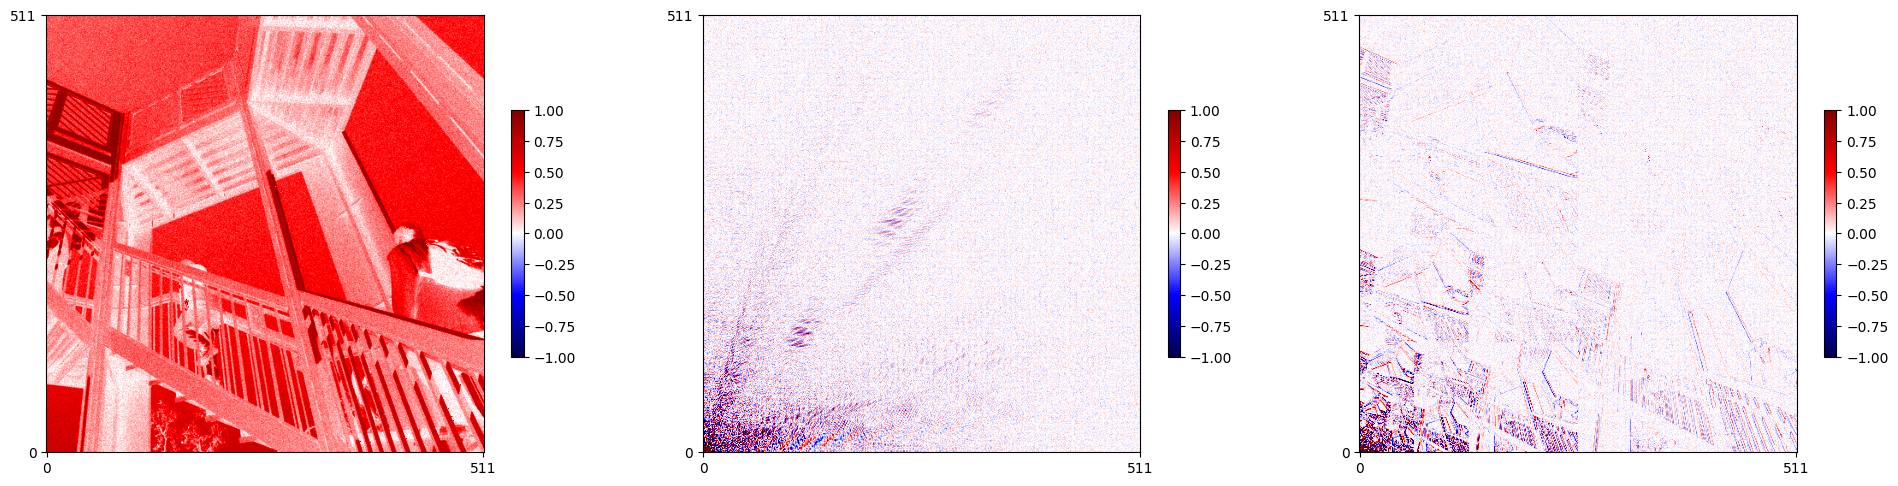

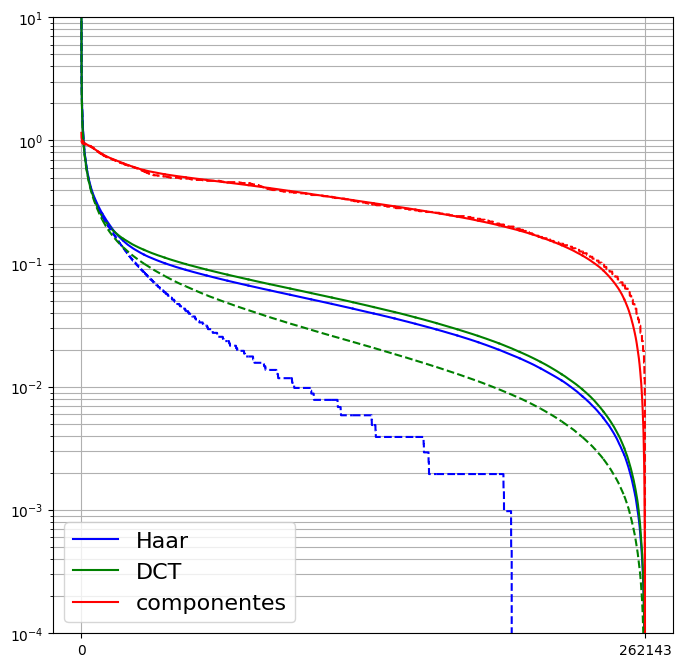

In [25]:
# coordenadas de la imagen con ruido en la base de coseno discreta
CY = dctn(Y, norm='ortho')
# coordenadas de la imagen con ruido en la base de wavelets de haar
WY, _ = pywt.coeffs_to_array(pywt.wavedec2(Y, 'haar', mode='periodic', level=None))
# magnitudes de las coordenadas en la base de coseno discreto en orden decreciente
CYord = np.flipud(np.sort(np.abs(CY.ravel())))
# magnitudes de las coordenadas en la base de wavelets de haar en orden decreciente
WYord = np.flipud(np.sort(np.abs(WY.ravel())))
# magnitudes de las intensidades de la imagen con ruido en orden decreciente
Yord = np.flipud(np.sort(np.abs(Y.ravel())))

plt.figure(figsize=(24, 8))
plt.subplot(1, 3, 1)
plt.imshow(Y, origin='lower', cmap='seismic', vmin=-1.0, vmax=1.0)
plt.xticks([ 0, N - 1 ])
plt.yticks([ 0, N - 1 ])
plt.colorbar(shrink=0.4)
plt.subplot(1, 3, 2)
plt.imshow(CY, origin='lower', cmap='seismic', vmin=-1.0, vmax=1.0)
plt.xticks([ 0, N - 1 ])
plt.yticks([ 0, N - 1 ])
plt.colorbar(shrink=0.4)
plt.subplot(1, 3, 3)
plt.imshow(WY, origin='lower', cmap='seismic', vmin=-1.0, vmax=1.0)
plt.xticks([ 0, N - 1 ])
plt.yticks([ 0, N - 1 ])
plt.colorbar(shrink=0.4)
plt.show()

plt.figure(figsize=(8, 8))
plt.plot(range(N ** 2), WYord, color='b', label='Haar')
plt.plot(range(N ** 2), CYord, color='g', label='DCT')
plt.plot(range(N ** 2), Yord, color='r', label='componentes')
plt.plot(range(N ** 2), WXord, color='b', linestyle='--')
plt.plot(range(N ** 2), CXord, color='g', linestyle='--')
plt.plot(range(N ** 2), Xord, color='r', linestyle='--')
plt.xticks([ 0, N ** 2 - 1 ])
plt.yticks([ 1E-4, 1E+0 ])
plt.ylim([ 1E-4, 1E+1 ])
plt.yscale('log')
plt.grid('on', which='both')
plt.legend(fontsize=16, loc='lower left')
plt.show()

Esto muestra que tanto en la base de coseno discreto como en la base de wavelets de Haar las coordenadas de menor valor son las más afectadas por el ruido. Por lo tanto, una estrategia para reducir el ruido es **remover** las coordenadas que son predominantemente ruido. En particular, **podemos reemplazar por cero todas las coordenadas cuya magnitud está por debajo de un cierto umbral**. Esto se llama *hard thresholding*. 

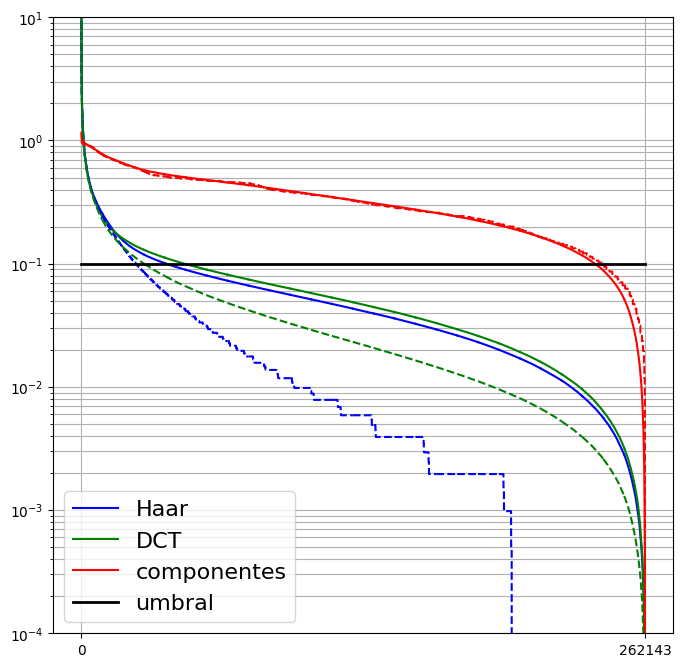

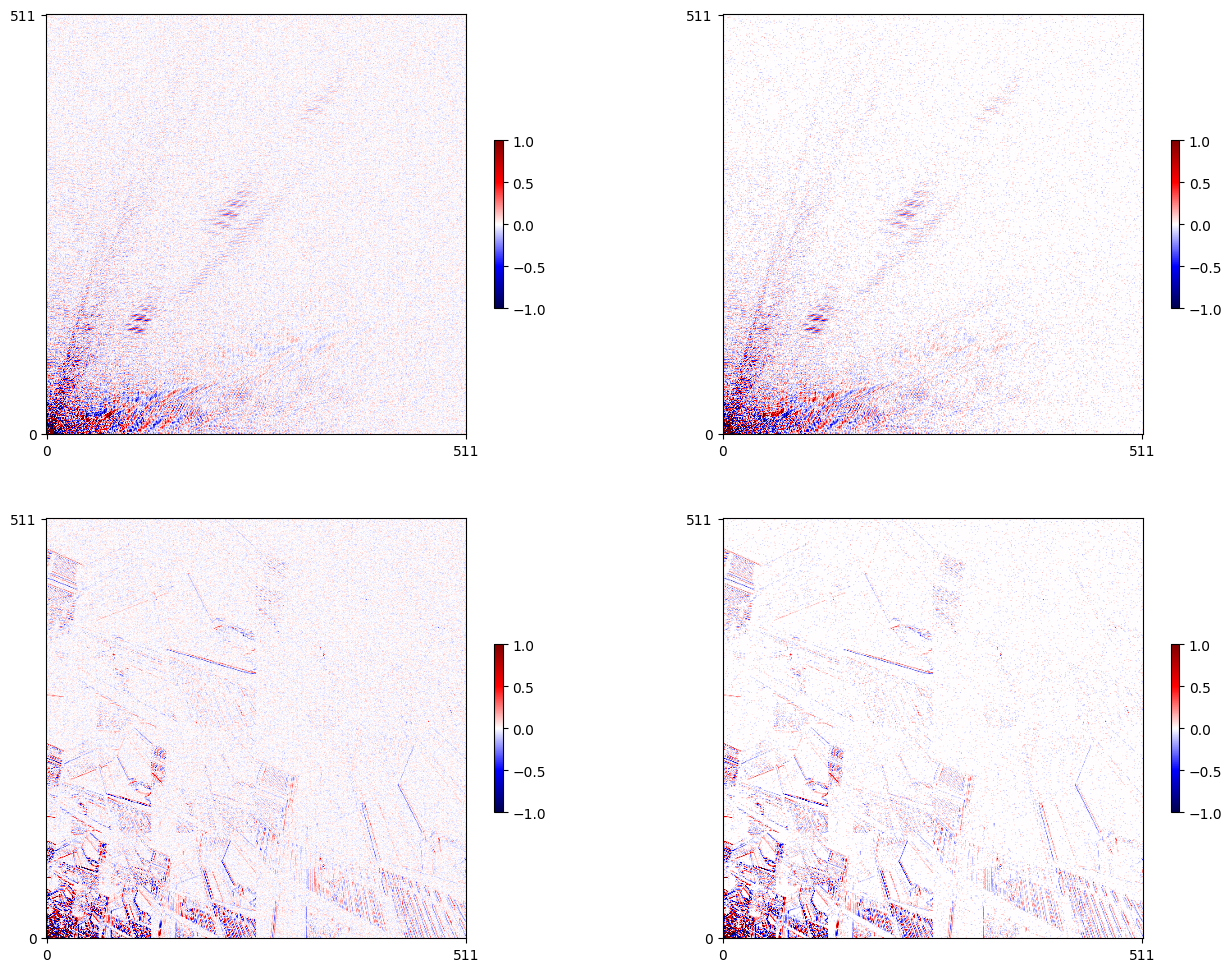

In [26]:
# umbral
c_thr = 1E-1
# hard thresholding sobre las coordenadas en la base de coseno discreto
HT_CY = np.where(np.abs(CY) <= c_thr, 0.0, CY)
# hard thresholding sobre las coordenadas en la base de wavelets de haar
HT_WY = np.where(np.abs(WY) <= c_thr, 0.0, WY)

plt.figure(figsize=(8, 8))
plt.plot(range(N ** 2), WYord, color='b', label='Haar')
plt.plot(range(N ** 2), CYord, color='g', label='DCT')
plt.plot(range(N ** 2), Yord, color='r', label='componentes')
plt.plot(range(N ** 2), WXord, color='b', linestyle='--')
plt.plot(range(N ** 2), CXord, color='g', linestyle='--')
plt.plot(range(N ** 2), Xord, color='r', linestyle='--')
plt.plot([ 0, N ** 2 - 1 ], [ c_thr, c_thr ], color='k', linewidth=2, label='umbral')
plt.xticks([ 0, N ** 2 - 1 ])
plt.yticks([ 1E-4, 1E+0 ])
plt.ylim([ 1E-4, 1E+1 ])
plt.yscale('log')
plt.grid('on', which='both')
plt.legend(fontsize=16, loc='lower left')
plt.show()

plt.figure(figsize=(16, 12))
plt.subplot(2, 2, 1)
plt.imshow(CY, origin='lower', cmap='seismic', vmin=-1.0, vmax=1.0)
plt.xticks([ 0, N - 1 ])
plt.yticks([ 0, N - 1 ])
plt.colorbar(shrink=0.4)
plt.subplot(2, 2, 2)
plt.imshow(HT_CY, origin='lower', cmap='seismic', vmin=-1.0, vmax=1.0)
plt.xticks([ 0, N - 1 ])
plt.yticks([ 0, N - 1 ])
plt.colorbar(shrink=0.4)
plt.subplot(2, 2, 3)
plt.imshow(WY, origin='lower', cmap='seismic', vmin=-1.0, vmax=1.0)
plt.xticks([ 0, N - 1 ])
plt.yticks([ 0, N - 1 ])
plt.colorbar(shrink=0.4)
plt.subplot(2, 2, 4)
plt.imshow(HT_WY, origin='lower', cmap='seismic', vmin=-1.0, vmax=1.0)
plt.xticks([ 0, N - 1 ])
plt.yticks([ 0, N - 1 ])
plt.colorbar(shrink=0.4)
plt.show()


Visualizamos las imágenes reconstruídas.

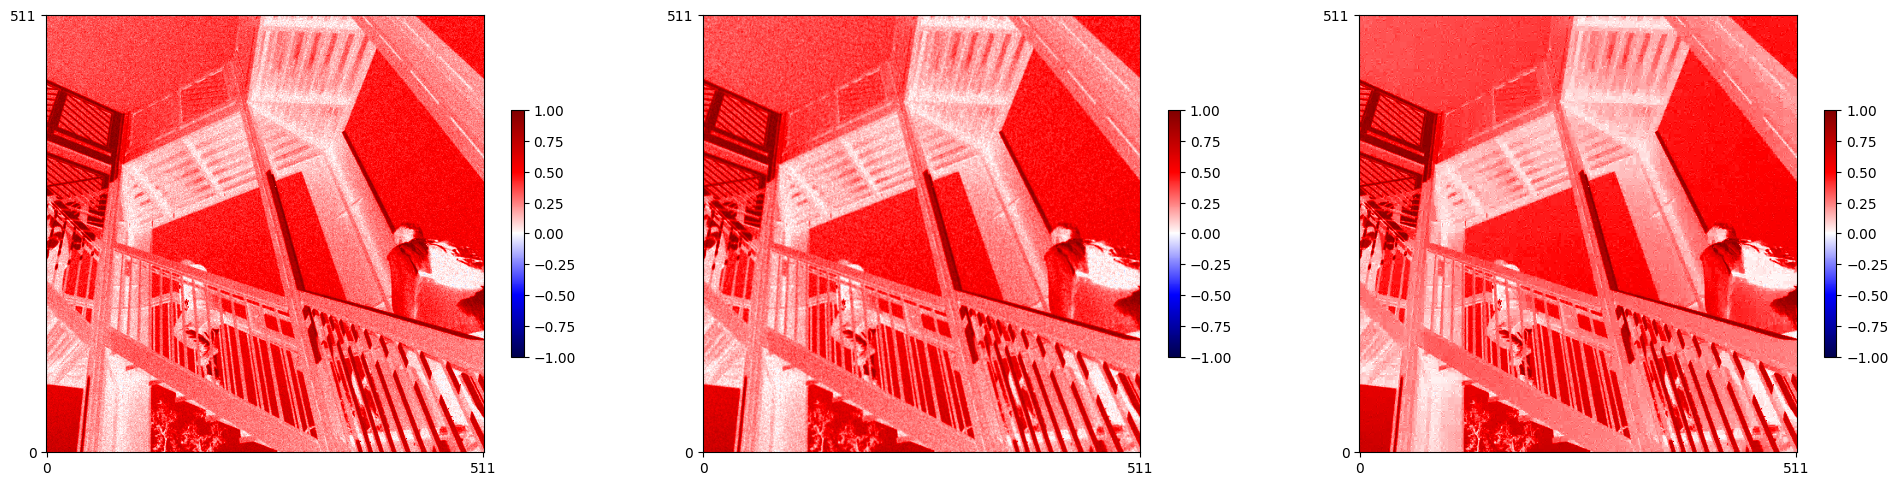

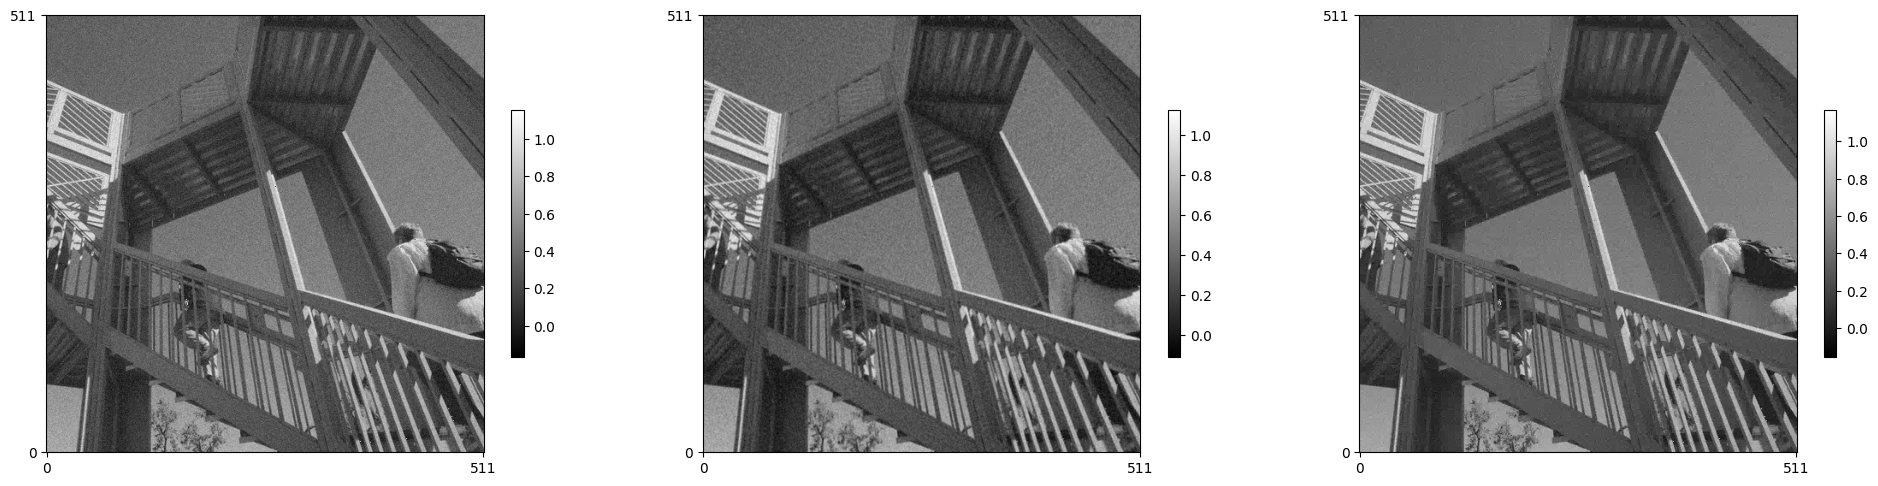

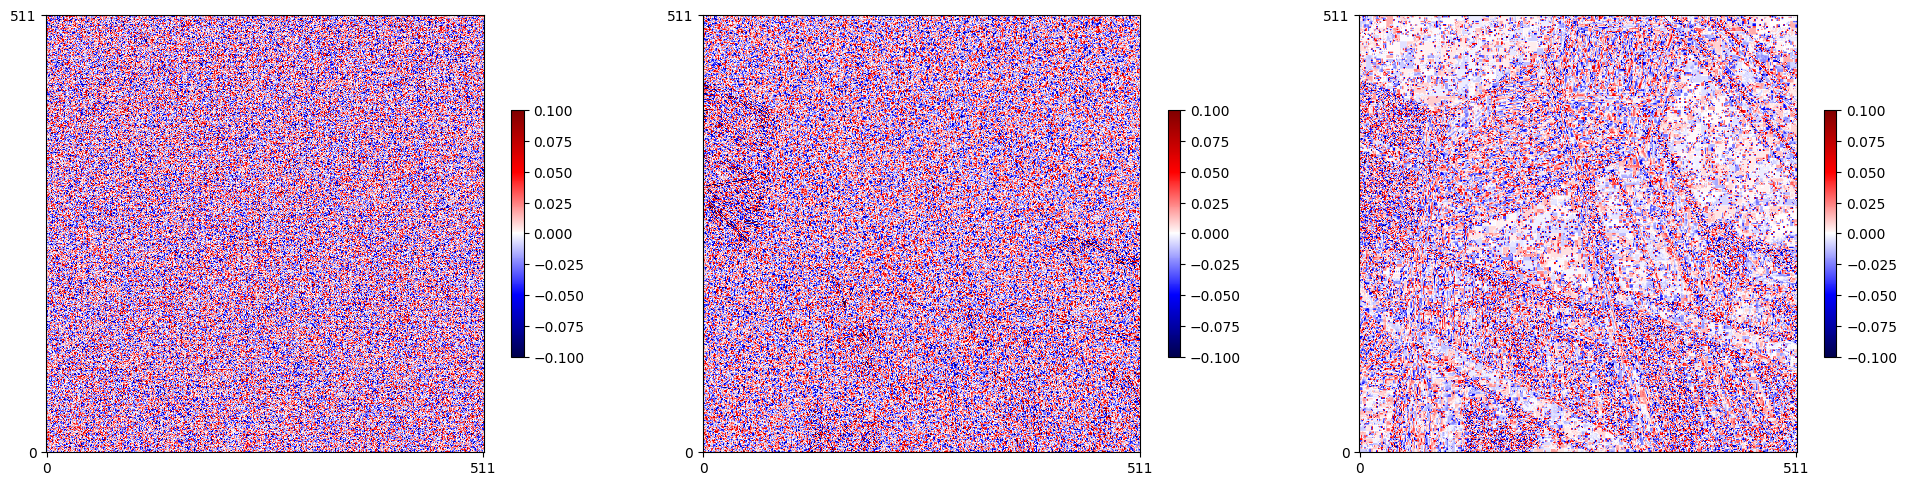

In [27]:
# calcular la combinacion lineal de la base de coseno discreta
Y_HT_CY = idctn(HT_CY, norm='ortho')
# calcular la combinacion lineal de la base de wavelets de haar
Y_HT_WY = pywt.waverec2(pywt.array_to_coeffs(HT_WY, BWX, output_format='wavedec2'), 'haar', mode='periodic')

plt.figure(figsize=(24, 8))
plt.subplot(1, 3, 1)
plt.imshow(Y, origin='lower', cmap='seismic', vmin=-1.0, vmax=1.0)
plt.xticks([ 0, N - 1 ])
plt.yticks([ 0, N - 1 ])
plt.colorbar(shrink=0.4)
plt.subplot(1, 3, 2)
plt.imshow(Y_HT_CY, origin='lower', cmap='seismic', vmin=-1.0, vmax=1.0)
plt.xticks([ 0, N - 1 ])
plt.yticks([ 0, N - 1 ])
plt.colorbar(shrink=0.4)
plt.subplot(1, 3, 3)
plt.imshow(Y_HT_WY, origin='lower', cmap='seismic', vmin=-1.0, vmax=1.0)
plt.xticks([ 0, N - 1 ])
plt.yticks([ 0, N - 1 ])
plt.colorbar(shrink=0.4)
plt.show()

plt.figure(figsize=(24, 8))
plt.subplot(1, 3, 1)
plt.imshow(Y, origin='lower', cmap='gray')
plt.xticks([ 0, N - 1 ])
plt.yticks([ 0, N - 1 ])
plt.colorbar(shrink=0.4)
plt.subplot(1, 3, 2)
plt.imshow(Y_HT_CY, origin='lower', cmap='gray')
plt.xticks([ 0, N - 1 ])
plt.yticks([ 0, N - 1 ])
plt.colorbar(shrink=0.4)
plt.subplot(1, 3, 3)
plt.imshow(Y_HT_WY, origin='lower', cmap='gray')
plt.xticks([ 0, N - 1 ])
plt.yticks([ 0, N - 1 ])
plt.colorbar(shrink=0.4)
plt.show()

plt.figure(figsize=(24, 8))
plt.subplot(1, 3, 1)
plt.imshow(Y - X, origin='lower', cmap='seismic', vmin=-1E-1, vmax=+1E-1)
plt.xticks([ 0, N - 1 ])
plt.yticks([ 0, N - 1 ])
plt.colorbar(shrink=0.4)
plt.subplot(1, 3, 2)
plt.imshow(Y_HT_CY - X, origin='lower', cmap='seismic', vmin=-1E-1, vmax=+1E-1)
plt.xticks([ 0, N - 1 ])
plt.yticks([ 0, N - 1 ])
plt.colorbar(shrink=0.4)
plt.subplot(1, 3, 3)
plt.imshow(Y_HT_WY - X, origin='lower', cmap='seismic', vmin=-1E-1, vmax=+1E-1)
plt.xticks([ 0, N - 1 ])
plt.yticks([ 0, N - 1 ])
plt.colorbar(shrink=0.4)
plt.show()